Nainstalujeme potrebne knihovny

In [2]:
!!pip install beautifulsoup4
!!pip install tqdm
!!pip install pandas
!!pip install matplotlib
# TODO: pridat ostatni knihovny scipy, seaborn, requests

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import requests
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
from matplotlib.pyplot import figure
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import statistics



Zadejte brand a model pro kazde auto

In [3]:
# brand_model_1= {'brand': 'volkswagen', 'model': 'caddy'}
# brand_model_2= {'brand': 'volkswagen', 'model': 'passat-cc'}

Dale staci projet funkci, kteri vytahnou data o autech z webu www.autoesa.cz

In [4]:
# funkce ktera vytahne potrebnou informaci z karticky s autem
def extract_price_and_title(car):
    car_title = car.find("span", class_="car-title").text
    car_price_dirty = car.find("div", class_="car_item__price_block text-red").find("span", class_="price").text
    car_price = re.sub("[^0-9]", '', car_price_dirty)
    car_year = car.find("div", class_ = "car_item__icon icon_year").text
    car_power = car.find("div", class_ = "car_item__icon icon_power").text
    car_fuel = car.find("div", class_ = "car_item__icon icon_fuel").text
    car_range = car.find("div", class_ = "car_item__icon icon_range").text
    return {
        "title": car_title,
        "price": int(car_price),
        "year": car_year,
        "power": car_power,
        "fuel": car_fuel,
        "range": car_range
    }

# funkce, ktera projde stranky zvolene znacky a modelu, a extrahuje potrebne informace
def databrand (brand, model):
    final=[]
    url = 'https://www.autoesa.cz'
    # vypocitani poctu stranek
    brand_all = f"{url}/{brand}/{model}?stranka=1"
    response = requests.get(brand_all).text
    soup = BeautifulSoup(response, 'html.parser')
    # num_pg_str = soup.find("div", class_="pagination").find("li", class_="dots dots-last").find("a", class_="ajax").text

    num_pg = 1
    pagination = soup.find("div", class_="pagination")
    if pagination is None:
        # zde udelame neco, kdyz tam nic neni -> je jen jedna stranka
        pass
    elif pagination.find("li", class_="dots dots-last") is not None:
        # zde udelame neco, kdyz je tam cislo posledni stranky s teckami
        num_pg_str = pagination.find("li", class_="dots dots-last").text
        num_pg = int(re.sub("[^0-9]", '', num_pg_str))
    else:
        # zde udelame neco, kdyz je mensi pocet stranek
        num_pg_str = soup.find("div", class_="pagination").find_all("li")[-2].text
        num_pg = int(re.sub("[^0-9]", '', num_pg_str))

    # try:
    #     num_pg_str = soup.find("div", class_="pagination").find("li", class_="dots dots-last").find("a", class_="ajax").text
    #     num_pg = int(re.sub("[^0-9]", '', num_pg_str))
    # except AttributeError:
    #     try:
    #         num_pg_str=[]
    #         for page in soup.find_all("div", class_="pagination"):
    #             num_pg_str.append(list(str(re.sub("[^0-9]", '', page.text))))
    #         num_pg = int(num_pg_str[0][-1])
    #     except IndexError:
    #         num_pg=1



    # pocet stranek
    # num_pg = int(re.sub("[^0-9]", '', num_pg_str))

    # rada 1 az str_int
    page_range= [i for i in range(1,num_pg+1)]
    for i in tqdm(page_range):
        brand_url = f"{url}/{brand}/{model}?stranka={i}"
        page_html = requests.get(brand_url).text
        soup1 = BeautifulSoup(page_html, 'html.parser')
        cars_list = soup1.find_all("a", class_="car_item")
        final+=map(extract_price_and_title, cars_list)
    return final

Ulozeni nasbiranych dat (brand='znacku auta', model='model auta')

In [5]:
# #promenna pro data znacky skoda fabia
# data_auto_1= databrand(brand=brand_model_1['brand'], model=brand_model_1['model'])
# #promenna pro data znacky ford focus
# data_auto_2= databrand(brand=brand_model_2['brand'], model=brand_model_2['model'])

car_brand1 = 'volkswagen'
car_model1 = 'caddy'

car_brand2 = 'volkswagen'
car_model2 = 'passat-cc'

def car_data (car_brand, car_model):
    return databrand(brand=car_brand, model=car_model), str(car_brand) + ' ' + str(car_model)

data_auto_1, label1 = car_data (car_brand = car_brand1, car_model = car_model1)
data_auto_2, label2 = car_data (car_brand = car_brand2, car_model = car_model2)



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


Dale pripravime promenne pro grafy

In [6]:
#1znacka: vytahne z finalnich dat separatni listy pro kazdy parametr zvlast
def lists_for_graph (data_brand):
    price_lst=[]
    name_lst=[]
    year_lst=[]
    power_lst=[]
    fuel_lst=[]
    range_lst=[]
    for item in data_brand:
        price_lst.append(item['price'])
        name_lst.append(item['title'])
        year_lst.append(int(item['year']))
        power_lst.append(int(re.sub("[^0-9]", '', item['power'])))
        fuel_lst.append(item['fuel'])
        range_lst.append(int(re.sub("[^0-9]", '', item['range'])))
    return price_lst, name_lst, year_lst, power_lst, fuel_lst, range_lst

#znacka1

price_lst_1, name_lst_1, year_lst_1, power_lst_1, fuel_lst_1, range_lst_1 = lists_for_graph(data_auto_1)

#znacka2

price_lst_2, name_lst_2, year_lst_2, power_lst_2, fuel_lst_2, range_lst_2 = lists_for_graph(data_auto_2)


GRAFY

Srovnavaci graf, ktery ukazuje min, max a avg cen zkoumanych znacek aut

<Figure size 800x400 with 0 Axes>

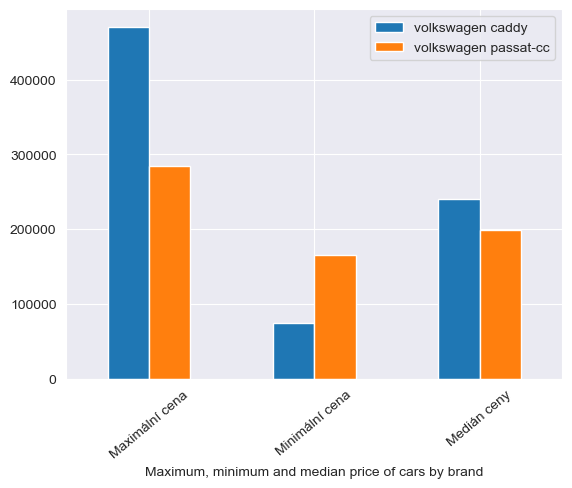

In [7]:

# najde min, max a prumernou cenu aut vyhledavane znacky&modelu
min_max_avg_label=['Maximální cena', 'Minimální cena', 'Medián ceny']

def max_min_avg_data (data_brand):
    max_price = max(item['price'] for item in data_brand)
    min_price = min(item['price'] for item in data_brand)
    # avg_price = float(sum(item['price'] for item in data_brand)) / len(data_brand)
    mdn_price = statistics.median (list (item['price'] for item in data_brand))
    #pridame do jednoho listu max, min a avg ceny aut konkretni znacky
    min_max_avg_list=[]
    min_max_avg_list.append(max_price)
    min_max_avg_list.append(min_price)
    # min_max_avg_list.append(round(avg_price))
    min_max_avg_list.append (round(mdn_price))
    return min_max_avg_list

# auto 1
aggregated_data1 = max_min_avg_data (data_auto_1)

# auto 2
aggregated_data2 = max_min_avg_data (data_auto_2)

# print (aggregated_data1)
#
# print (aggregated_data2)


# # vytvorime parametry pro osu x a y
# # auto 1
# label1 = brand_model_1['brand']+' '+brand_model_1['model']
# # auto 2
# label2 = brand_model_2['brand']+' '+brand_model_2['model']

### vykresleni grafu ###

df = pd.DataFrame(
    {
        "Maximum, minimum and median price of cars by brand": min_max_avg_label,
        label1: aggregated_data1,
        label2: aggregated_data2
    }
)

figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='r')
df.plot.bar(x='Maximum, minimum and median price of cars by brand', y = [label1, label2], rot = 40)

plt.show()

Dale jsou sloupcove grafy, kteri ukazuji auta od nejdrazsiho

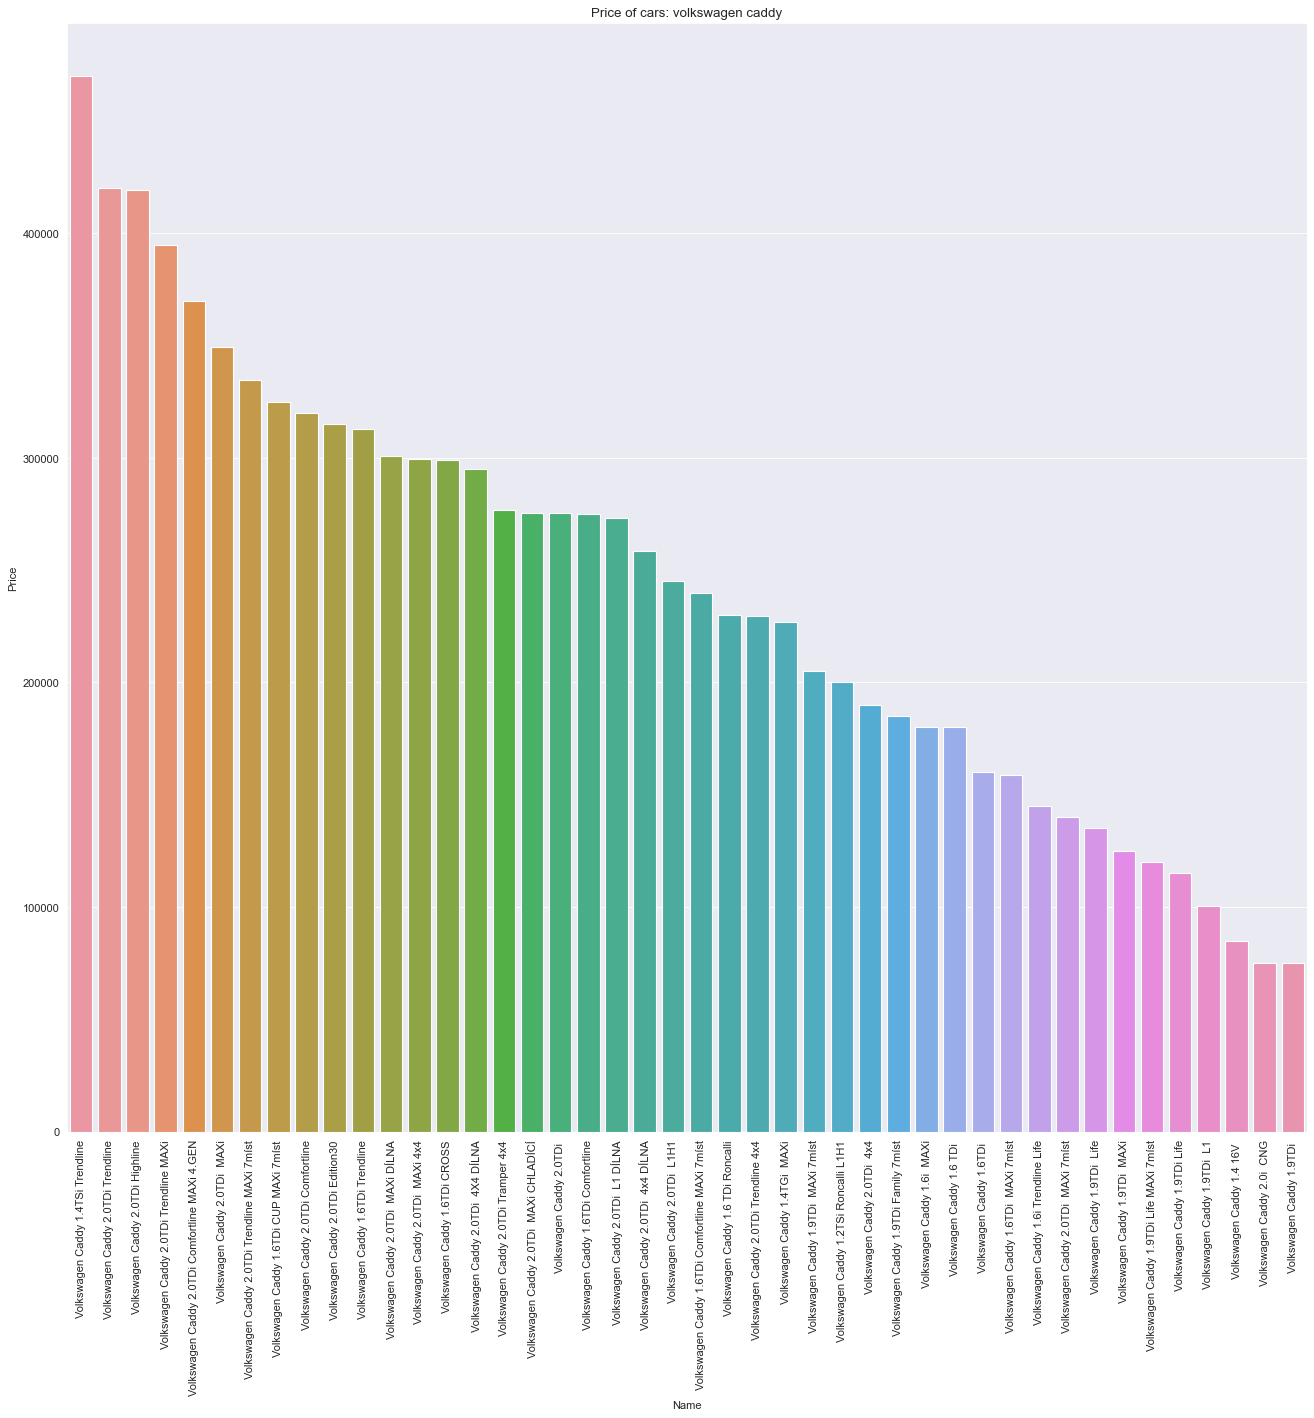

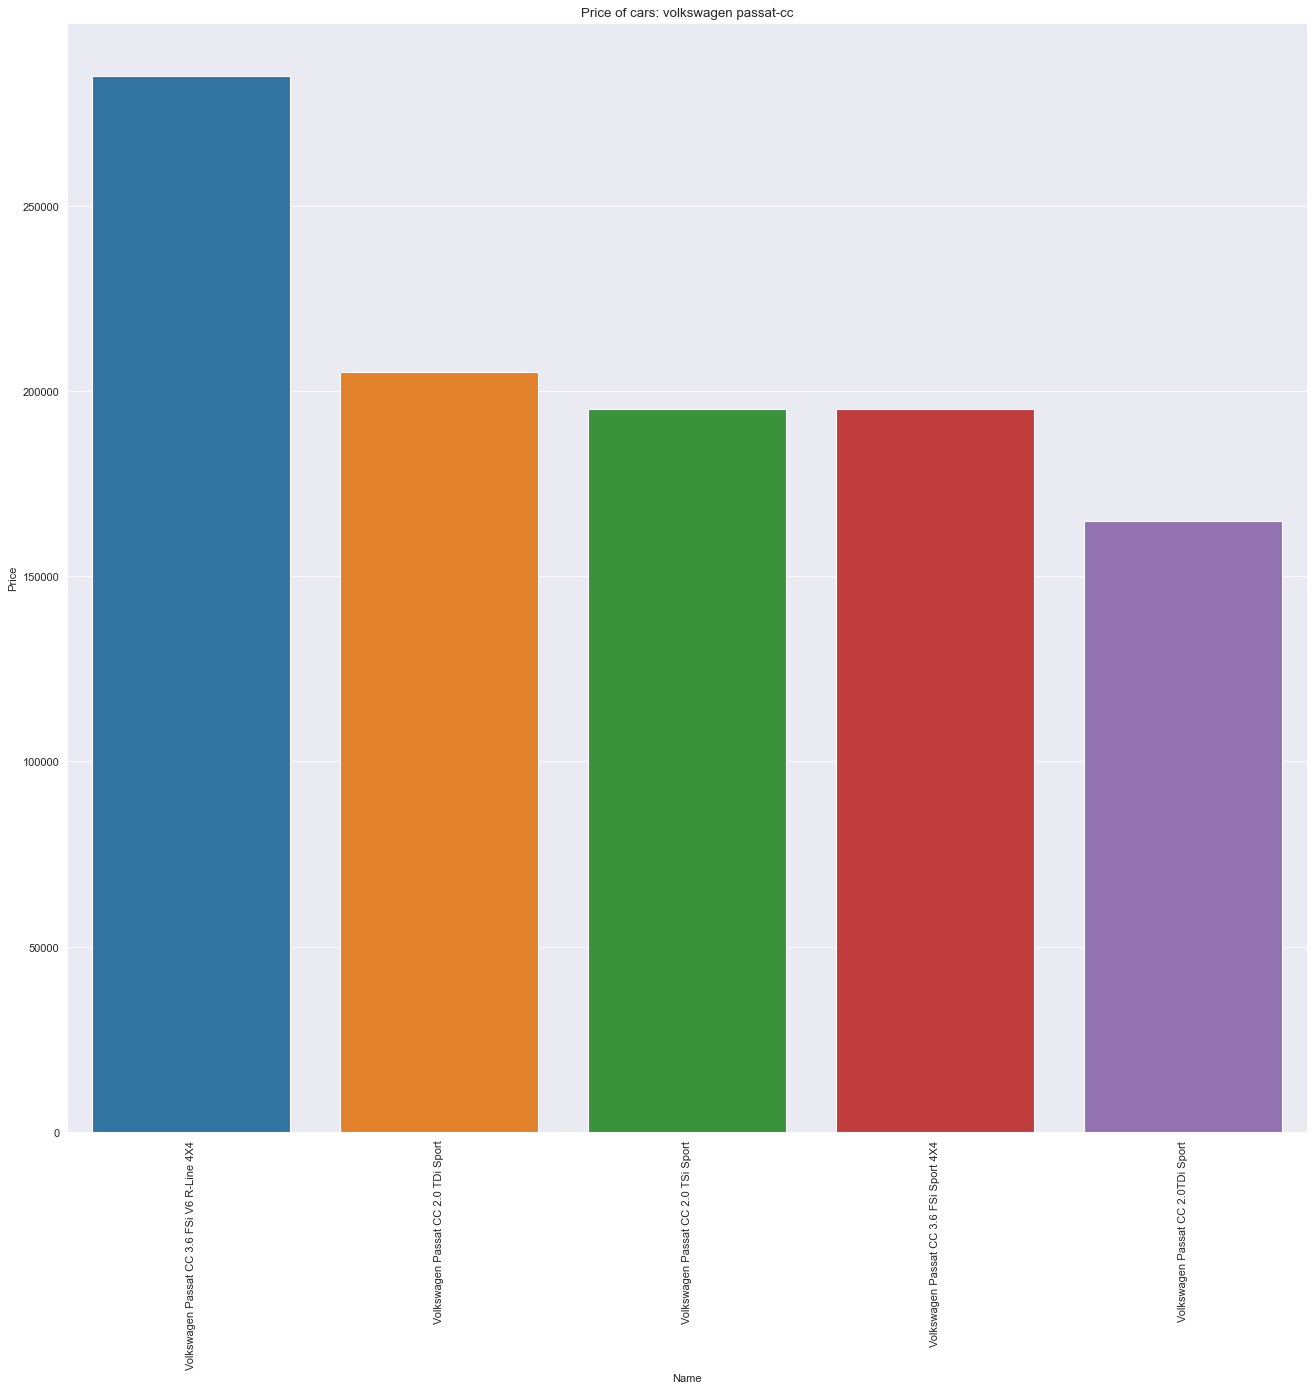

In [8]:
def barplot_graph (name, price):

    return dict(sorted(dict(zip(name, price)).items(), key=lambda x:x[1], reverse=True))

keys_1 = list(barplot_graph(name_lst_1, price_lst_1).keys())
vals_1 = list(barplot_graph(name_lst_1, price_lst_1).values())

keys_2 = list(barplot_graph(name_lst_2, price_lst_2).keys())
vals_2 = list(barplot_graph(name_lst_2, price_lst_2).values())

# # sparovani znacek aut a jejich cen pro nasledne serazeni
# # auto 1
# dic_name_price_1 = dict(zip(name_lst_1, price_lst_1))
# # auto 1
# dic_name_price_2 = dict(zip(name_lst_2, price_lst_2))
#
# #seradime auta dle ceny od nejvyssi
# # auto 1
# sorted_dic_name_price_1 = sorted(dic_name_price_1.items(), key=lambda x:x[1], reverse=True)
# # auto 1
# sorted_dic_name_price_2 = sorted(dic_name_price_2.items(), key=lambda x:x[1], reverse=True)
#
# # prevedeme to do formatu slovniku
# # auto 1
# converted_dict_1 = dict(sorted_dic_name_price_1)
# # auto 1
# converted_dict_2 = dict(sorted_dic_name_price_2)
#
# # auto 1: vytvorime parametry pro osu x a y
# keys_1 = list(converted_dict_1.keys())
# vals_1= list(converted_dict_1.values())
#
# # auto 2: vytvorime parametry pro osu x a y
# keys_2 = list(converted_dict_2.keys())
# vals_2= list(converted_dict_2.values())

### vykresleni grafu ###

def graph1 (keys, vals, label):
    figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
    sns.barplot(x=keys, y = vals).set(title="Price of cars: " + label, xlabel='Name', ylabel='Price')
    plt.xticks(rotation = 90)
    plt.show()

# auto 1

graph1 (keys_1, vals_1, label1)

# figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
# sns.barplot(x=keys_1, y = vals_1).set(title="Price of cars: " + label1, xlabel='Name', ylabel='Price')
# plt.xticks(rotation = 90)
# plt.show()

# auto 2

graph1 (keys_2, vals_2, label2)

# figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
# sns.barplot(x=keys_2, y = vals_2).set(title="Price of cars: " + label2, xlabel='Name', ylabel='Price')
# plt.xticks(rotation = 90)
# plt.show()

Bodovy graf, ktery ukazuje vztah ceny a rok vyroby aut

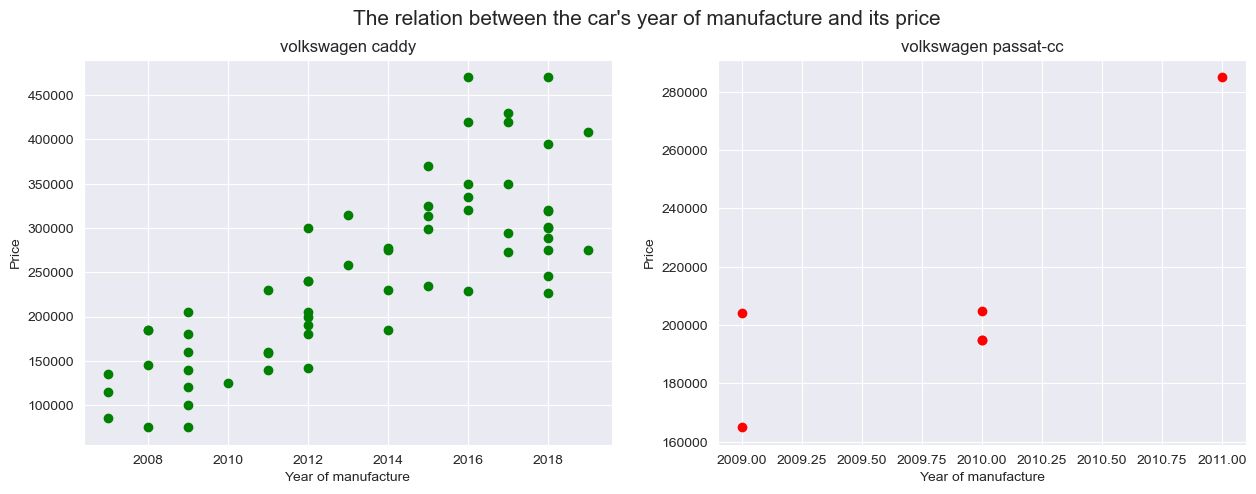

In [9]:
# auto 1: vytvorime parametry pro osu x a y
x_year_1= year_lst_1
y_year_1= price_lst_1

# auto 2: vytvorime parametry pro osu x a y
x_year_2= year_lst_2
y_year_2= price_lst_2

### vykresleni grafu ###

figure, axis = plt.subplots(1, 2)
figure.suptitle("The relation between the car's year of manufacture and its price", fontsize=15)
figure.set_figheight(5)
figure.set_figwidth(15)

# auto 1
axis[0].scatter(x_year_1, y_year_1, c='g')
axis[0].set_title(label1)
axis[0].set_xlabel("Year of manufacture")
axis[0].set_ylabel("Price")

# auto 2
axis[1].scatter(x_year_2, y_year_2, c='r')
axis[1].set_title(label2)
axis[1].set_xlabel("Year of manufacture")
axis[1].set_ylabel("Price")


plt.show()

Sloupcovy graf, ktery ukazuje % aut s kazdym typem paliva u kazde znacky

In [10]:
def barplot_graph2 (fuel):

    return dict(sorted({i:(fuel.count(i)/len(fuel))*100 for i in fuel}.items(), key=lambda x:x[1], reverse=True))

x_fuel_1 = list(barplot_graph2(fuel_lst_1).keys())
y_fuel_1= list(barplot_graph2(fuel_lst_1).values())
z_fuel_1=[label1] * len(y_fuel_1)


x_fuel_2 = list(barplot_graph2(fuel_lst_2).keys())
y_fuel_2= list(barplot_graph2(fuel_lst_2).values())
z_fuel_2=[label2] * len(y_fuel_2)
#
# # vypocitame % aut s kazdym typem paliva
# # auto 1
# fuel_auto_1 = {i:(fuel_lst_1.count(i)/len(fuel_lst_1))*100 for i in fuel_lst_1}
# # auto 2
# fuel_auto_2 = {i:(fuel_lst_2.count(i)/len(fuel_lst_2))*100 for i in fuel_lst_2}
#
# # seradime parametry slovniku od nejvyssiho %
# # auto 1
# sorted_fuel_auto_1 = sorted(fuel_auto_1.items(), key=lambda x:x[1], reverse=True)
# # auto 2
# sorted_fuel_auto_2 = sorted(fuel_auto_2.items(), key=lambda x:x[1], reverse=True)
#
# # prevedeme to do formatu slovniku
# # auto 1
# converted_fuel_auto_1 = dict(sorted_fuel_auto_1)
# # auto 2
# converted_fuel_auto_2 = dict(sorted_fuel_auto_2)
#
#
# # auto 1: vytvorime parametry pro dataframe
# x_fuel_1 = list(converted_fuel_auto_1.keys())
# y_fuel_1= list(converted_fuel_auto_1.values())
# z_fuel_1=[label1] * len(y_fuel_1)
#
# # auto 2: vytvorime parametry pro dataframe
# x_fuel_2 = list(converted_fuel_auto_2.keys())
# y_fuel_2= list(converted_fuel_auto_2.values())
# z_fuel_2=[label2] * len(y_fuel_2)

# vytvareni dataframu pro zobrazeni dat
df_fuel = pd.DataFrame (
    {
        'Type of fuel': list(converted_fuel_auto_1.keys()) + list(converted_fuel_auto_2.keys()),
        'Number of cars': list(converted_fuel_auto_1.values()) + list(converted_fuel_auto_2.values()),
        'Brand of car': z_fuel_1 + z_fuel_2
    }
)

### vykresleni grafu ###

sns.set(style='white')
sns.barplot(x='Type of fuel', y='Number of cars', hue='Brand of car', data=df_fuel, palette=['purple', 'steelblue'])
plt.title('Number of cars with each type of fuel', fontsize=15)
plt.xlabel('Type of fuel')
plt.ylabel('Number of cars (%)')

plt.show()

NameError: name 'converted_fuel_auto_1' is not defined

Bodovy graf, ktery ukazuje vztah ceny a vykonu aut

In [ ]:
# auto 1: vytvorime parametry pro osu x a y
x_power_1 = power_lst_1
y_price_1 = price_lst_1

# auto 2: vytvorime parametry pro osu x a y
x_power_2 = power_lst_2
y_price_2 = price_lst_2


### vykresleni grafu ###

figure, axis = plt.subplots(1, 2)
figure.suptitle("The relation between the car's power and its price", fontsize=15)
figure.set_figheight(5)
figure.set_figwidth(15)

# auto 1
axis[0].scatter(x_power_1, y_price_1, c='orange')
axis[0].set_title(label1)
axis[0].set_xlabel("Power")
axis[0].set_ylabel("Price")

# auto 2
axis[1].scatter(x_power_2, y_price_2, c='blue')
axis[1].set_title(label2)
axis[1].set_xlabel("Power")
axis[1].set_ylabel("Price")


plt.show()


3D grafy, kteri ukazuji vztah cen, roku vyroby a stavu tachometru aut kayde zkoumane znacky

In [ ]:
# auto 1: vytvorime parametry pro osu x, y a z
x_3d_auto1 = price_lst_1
y_3d_auto1 = year_lst_1
z_3d_auto1 = range_lst_1

# auto 2: vytvorime parametry pro osu x, y a z
x_3d_auto2 = price_lst_2
y_3d_auto2 = year_lst_2
z_3d_auto2 = range_lst_2

### vykresleni grafu ###

fig = plt.figure(dpi=70)
ax = fig.add_subplot(1, 2, 1, projection='3d')
fig.suptitle("The price depends on the car's year of manufacture and the tachometer status", fontsize=15)
fig.set_figheight(10)
fig.set_figwidth(20)

# auto 1
ax.scatter(x_3d_auto1, y_3d_auto1, z_3d_auto1,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200, c='b')
ax.set_title(label1)
ax.set_xlabel('Price of car')
ax.set_ylabel('Year of manufacture')
ax.set_zlabel('Tachometer Status')
ax.set_yticks(range(min(y_3d_auto1), max(y_3d_auto1), 2))

# auto 2

ax = fig.add_subplot(1, 2, 2, projection='3d')


ax.scatter(x_3d_auto2, y_3d_auto2, z_3d_auto2,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200, c='g')
ax.set_title(label2)
ax.set_xlabel('Price of car')
ax.set_ylabel('Year of manufacture')
ax.set_zlabel('Tachometer Status')
ax.set_yticks(range(min(y_3d_auto2), max(y_3d_auto2), 2))

plt.show()
